In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

### Get data for S&P500

In [45]:
url_sp500 = 'https://raw.githubusercontent.com/alexander34ro/AML-Replicating-Novel-Deep-Learning-with-CNN-and-Bi-Directional-LSTM-for-Improved-Index-Prediction/main/S%26P500.csv'

In [46]:
df = pd.read_csv(url_sp500, index_col='Date')

### Get close price for 2015 and 2016

In [47]:
close_price = df['Close'][df['Close'].index.to_series().between('2015-01-01', '2017-01-01')]

In [48]:
close_price.head()

Date
2015-01-02    2058.199951
2015-01-05    2020.579956
2015-01-06    2002.609985
2015-01-07    2025.900024
2015-01-08    2062.139893
Name: Close, dtype: float64

### Get predicitons from csv
Index for predictions starts at the 57th date of available close prices because according to our interpretion of the paper, the model uses the 50-day sequence the predict the price for the sevent day after the last day of the sequence.

In [49]:
predictions = np.genfromtxt('predictions_2015-2016.csv', delimiter=',')
predictions = pd.Series(index = close_price.index[56:], data = predictions)
predictions.head()

Date
2015-03-25    2058.199951
2015-03-26    2050.257235
2015-03-27    2056.339309
2015-03-30    2060.434433
2015-03-31    2073.656854
dtype: float64

### Make plot as in Figure 5

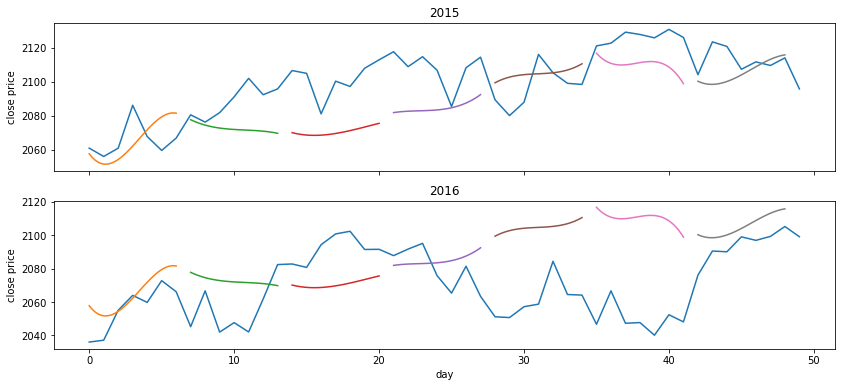

In [50]:
N = 50    # number of days to plot
k = 7     # length of trend to predict
polyorder = 3 # order of polynomial regression

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(14,6))

for ax, year in zip(axes, [2015, 2016]):
    
    truth = close_price[close_price.index.to_series().between(f'{year}-01-01', f'{year+1}-01-01')]
    ax.plot(np.arange(N), truth.iloc[56:(56+N)], label='truth')
    
    pred = predictions[predictions.index.to_series().between(f'{year}-01-01', f'{year+1}-01-01')]
    
    for i in range(k):

        x = np.arange(i*k, (i+1)*k)
        y = predictions.iloc[i*k:(i+1)*k]

        polreg = np.poly1d(np.polyfit(x, y, polyorder))

        new_x = np.linspace(i*k, (i+1)*k-1, 100)

        ax.plot(new_x, polreg(new_x), label='prediction')
        
    ax.set_title(year)
    ax.set_ylabel('close price')
    
axes[1].set_xlabel('day')

plt.show()